## Display GraphViz of a decision tree  

From kaggle : using drug200.csv 
https://www.kaggle.com/code/poojapramanik/decision-tree/data

In [45]:
import pandas as pd
import numpy as np
import graphviz
import pydotplus

from IPython.display import display

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import tree

df = pd.read_csv('drug200.csv')

In [46]:
df.describe()

,Age,Na_to_K
count,200.000000,200.000000
mean,44.315000,16.084485
std,16.544315,7.223956
min,15.000000,6.269000
25%,31.000000,10.445500
50%,45.000000,13.936500
75%,58.000000,19.380000
max,74.000000,38.247000


In [47]:
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


## Preapre the dataset

by converting categorical features to numerical ones
by defining X and y

In [48]:
df.replace({'Sex' : {'F':0 , 'M':1} , 
            'BP' : {'HIGH':0,'LOW':1,'NORMAL':2}, 
            'Cholesterol' : {'HIGH':0, 'NORMAL':1}},
           inplace=True)

df

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,0,0,0,25.355,DrugY
1,47,1,1,0,13.093,drugC
2,47,1,1,0,10.114,drugC
3,28,0,2,0,7.798,drugX
4,61,0,1,0,18.043,DrugY
...,...,...,...,...,...,...
195,56,0,1,0,11.567,drugC
196,16,1,1,0,12.006,drugC
197,52,1,2,0,9.894,drugX
198,23,1,2,1,14.020,drugX


In [49]:
y = df.Drug
X = df.drop('Drug', axis = 1)

In [50]:
print(y)
print()
print(X)

0      DrugY
1      drugC
2      drugC
3      drugX
4      DrugY
       ...  
195    drugC
196    drugC
197    drugX
198    drugX
199    drugX
Name: Drug, Length: 200, dtype: object

     Age  Sex  BP  Cholesterol  Na_to_K
0     23    0   0            0   25.355
1     47    1   1            0   13.093
2     47    1   1            0   10.114
3     28    0   2            0    7.798
4     61    0   1            0   18.043
..   ...  ...  ..          ...      ...
195   56    0   1            0   11.567
196   16    1   1            0   12.006
197   52    1   2            0    9.894
198   23    1   2            1   14.020
199   40    0   1            1   11.349

[200 rows x 5 columns]


## Training and Testing

In [51]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

## Make a decision tree

In [52]:
model = DecisionTreeClassifier()
model.fit(X, y)

DecisionTreeClassifier()

## Export GraphViz

In [53]:
dot_data = tree.export_graphviz(model, 
                                filled=True, 
                                rounded=True,  
                                special_characters=True,
                                out_file=None,
                           )

graph = graphviz.Source(dot_data)

## Save the decision tree in png

In [54]:
graph.format = 'png'
graph.render('decision_tree')

'decision_tree.png'

## Display in notebook

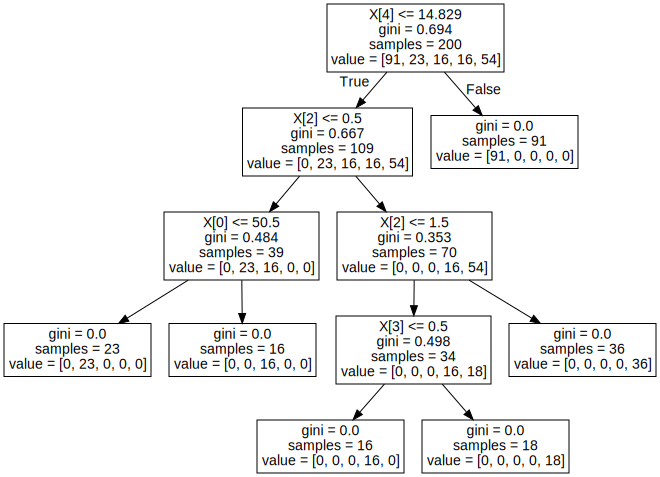

In [55]:
from IPython.display import display
display(graphviz.Source(tree.export_graphviz(model)))